***
*Workshop:* [TTSM (Technology & Thought in Sonic Media) summer school 2023](https://ttsm.link/) - Symbolic Music Data Processing and Generation

*Instructor:* Jingwei Liu (Music department, UC San Diego)
***

# <span style="background-color:darkorange; color:white; padding:2px 6px">Tutorial</span> 


# Music Information Retrieval (MIDI & CSV)

In our first workshop, we will learn how to process a typical MIDI file in Python. We will learn the structure and meaning of MIDI metadata and how to extract musical information from it. The processed data could be used in various tasks such as algorithmic composition, statistical corpus analysis, and our second workshop on neural network music generation.

## Part 1: MIDI as Music Format

MIDI is a mid-level representation for music signals. It extracts features from raw audio that most significantly represent the ongoing music and are able to reproduce the music from the distilled information to the greatest extent. The MIDI metadata could be viewed as a transcription of the listening-based music. Just like the score, although accompanied with certain information and nuances loss, the notations maintain the essence of the music with significantly reduced data size and symbols that're easy to manipulate. 

In [1]:
from music21 import *

*Package introduction*
- [Music21](https://web.mit.edu/music21/doc/about/what.html) is a Python-based toolkit for computer-aided musicology.

Example for this tutorial: *J.S. Bach Cello Suite No.1-Prelude*

In [2]:
file = "Music\cs1-1pre.mid"

In [3]:
s = converter.parse(file)

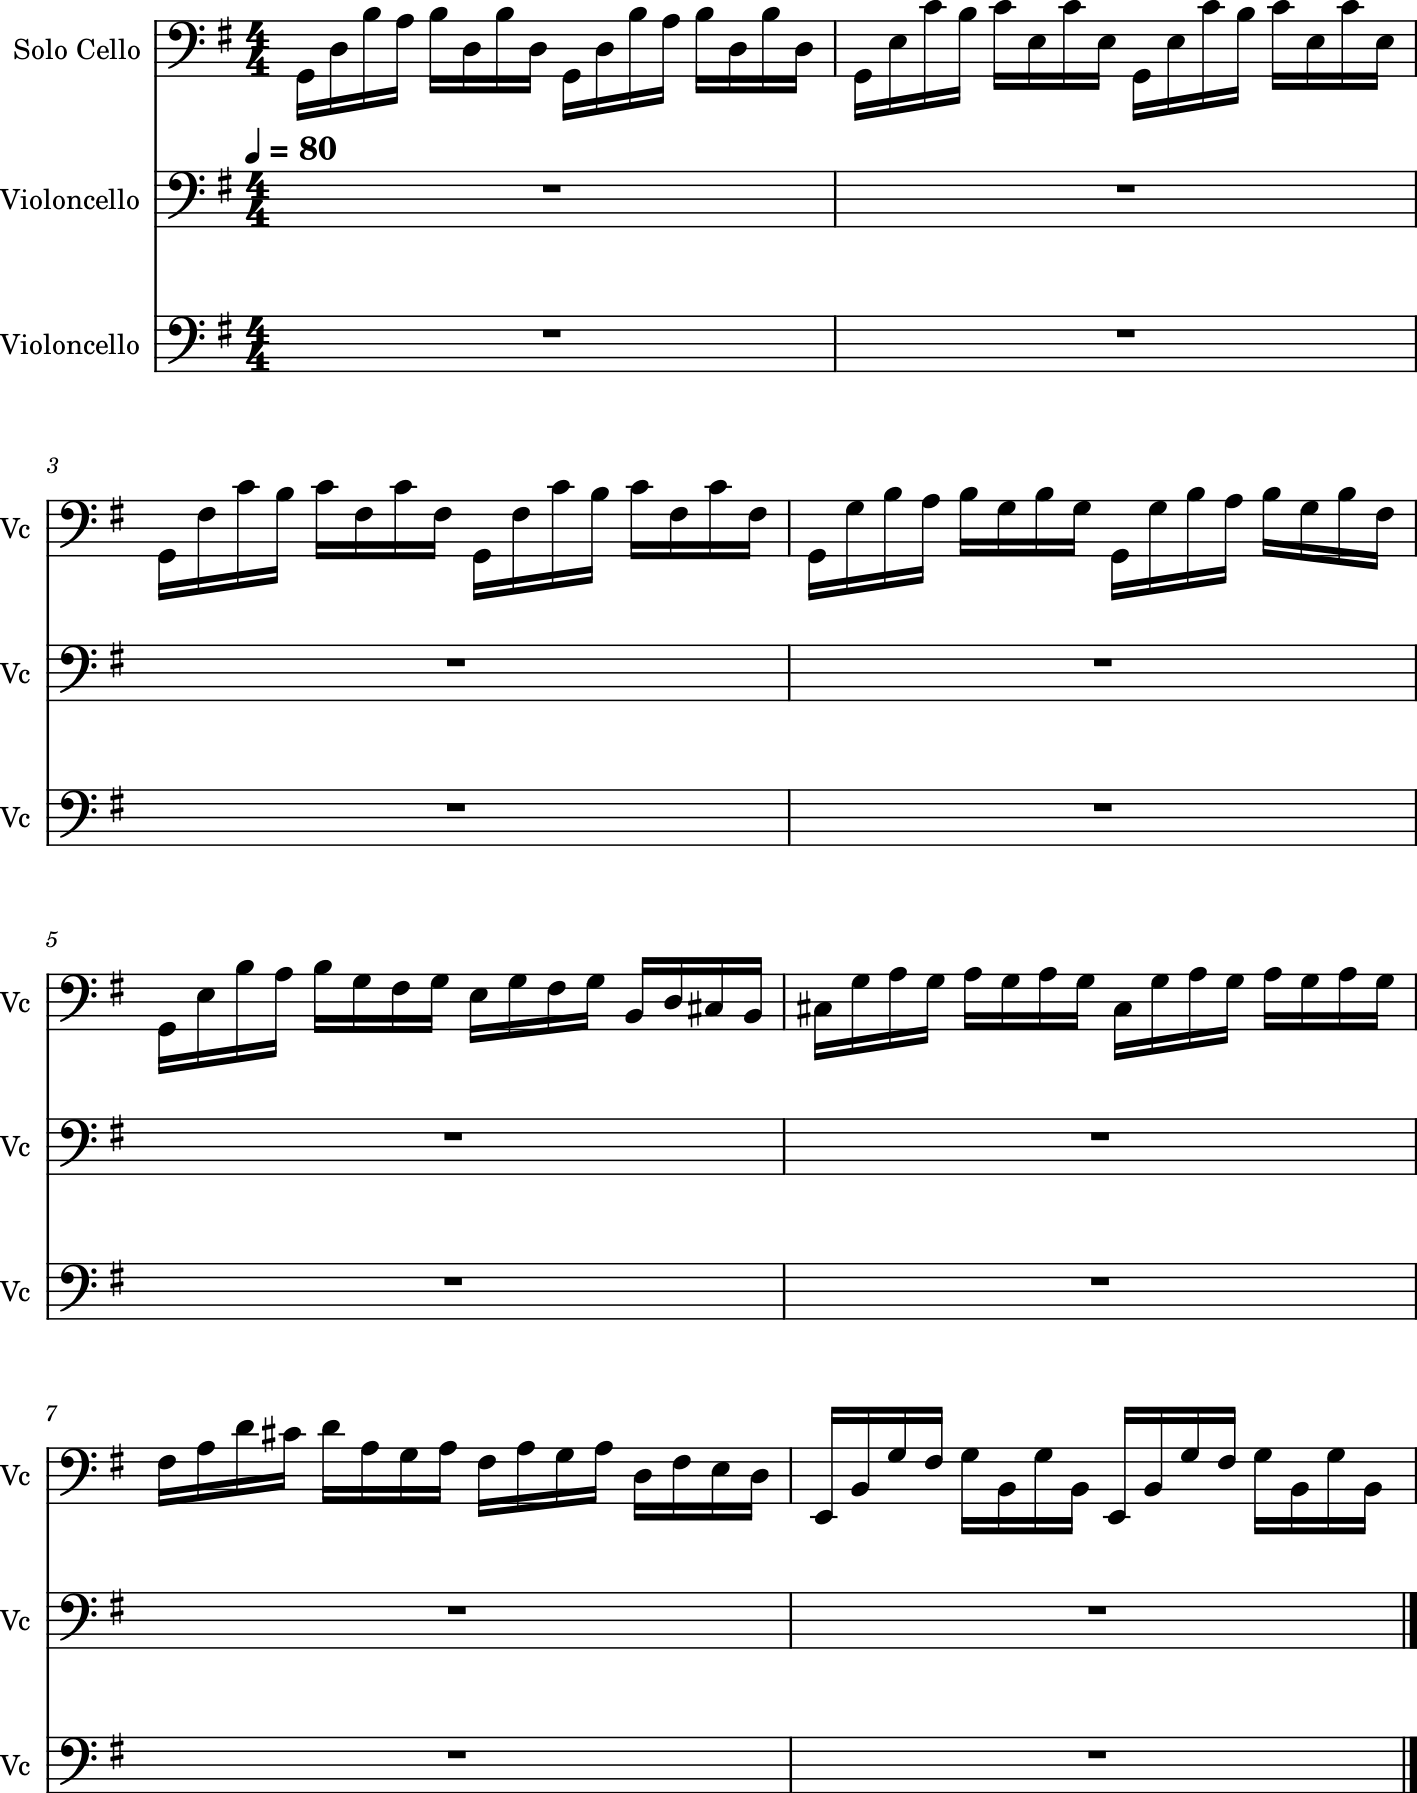

In [4]:
s.measures(0,8).show()

In [5]:
s.measures(0,8).show('mid')

For score following, we can open the MIDI file in any notation software such as [MuseScore](https://musescore.org/en).

*Remark 1 (Audio and symbolic music)*: This clip of 8 measures is 24 seconds long. The sampling rate of musical signal is typically 44100 Hz, namely 44100 datapoints per second. It requires $ 44100 * 24 = 1058400$ (over 1 million) datapoints to represent such a clip in audio format! However, in MIDI there are only less than 200 messages to encode such a clip, which significantly reduces the amount of data we need to take care of.

It's important to notice that there is a price for data reduction in symbolic music. The discrete symbols could only encode part of the music and with the modern music growing more and more out of the boundary of canonical music realm, the symbolic power is further weakened in studying such music. We will potentially limit ourselves in the field of notational music (music that could be well represented and reproduced by symbolic data) and for general music study, we refer the audience to the workshop next week -- which directly deals with audio signals in music generation.

That being said, MIDI is still a powerful tool that stores music information across various music genres in much condensed format while keeping a descent amount of details for replay. Unlike sheet music that's purely notational, MIDI works as a music player that's not necessarily depends on human interpretations. Listen to the following examples in MuseScore:

In [14]:
piano = "Music\e_piano_comp.mid"
jazz = "Music\Metheny_jazz.mid"

It shows that we are talking about music that could not only be read but also be played!

## Part 2: Read MIDI as CSV 

As many MIDI messages are based on sheet music such as key signature, time signature and quarter notes, in this tutorial, we will take the classical *Solo Cello Suite 1 - Prelude* of J.S. Bach as an example to showcase various ways of music data processing.

In [7]:
import py_midicsv as pm
import pandas as pd
import numpy as np

*Package introduction*
- [py_midicsv](https://pypi.org/project/py-midicsv/) is a Python library that bidirectionally convert between the binary MIDI format and a human-readable interpretation of the contained data in text format, expressed as CSV.
- [pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) is a python data analysis library.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.

Convert MIDI to CSV:

In [17]:
csv_string = pm.midi_to_csv(file) # try "piano" and "jazz"
csv_string

['0, 0, Header, 1, 17, 480\n',
 '1, 0, Start_track\n',
 '1, 0, Title_t, "untitled"\n',
 '1, 0, SMPTE_offset, 96, 0, 3, 0, 0\n',
 '1, 0, Time_signature, 4, 2, 24, 8\n',
 '1, 0, Key_signature, 1, "major"\n',
 '1, 0, Tempo, 750000\n',
 '1, 41040, Tempo, 3000000\n',
 '1, 41280, Tempo, 779221\n',
 '1, 41280, End_track\n',
 '2, 0, Start_track\n',
 '2, 0, MIDI_port, 0\n',
 '2, 0, Title_t, "Solo Cello"\n',
 '2, 0, Program_c, 0, 42\n',
 '2, 0, Control_c, 0, 7, 100\n',
 '2, 0, Control_c, 0, 10, 64\n',
 '2, 0, Note_on_c, 0, 43, 100\n',
 '2, 120, Note_on_c, 0, 43, 0\n',
 '2, 120, Note_on_c, 0, 50, 100\n',
 '2, 240, Note_on_c, 0, 50, 0\n',
 '2, 240, Note_on_c, 0, 59, 100\n',
 '2, 360, Note_on_c, 0, 59, 0\n',
 '2, 360, Note_on_c, 0, 57, 100\n',
 '2, 480, Note_on_c, 0, 57, 0\n',
 '2, 480, Note_on_c, 0, 59, 100\n',
 '2, 600, Note_on_c, 0, 59, 0\n',
 '2, 600, Note_on_c, 0, 50, 100\n',
 '2, 720, Note_on_c, 0, 50, 0\n',
 '2, 720, Note_on_c, 0, 59, 100\n',
 '2, 840, Note_on_c, 0, 59, 0\n',
 '2, 840, Note_

Write the csv string to txt:

In [18]:
MyFile = open("JS.txt","w")

for element in csv_string:
    MyFile.write(element)
MyFile.close()

You can open the file "JS.txt" in any text editor to read what's been written down.

### Please refer to [Midi-CSV file format](https://www.fourmilab.ch/webtools/midicsv/#:~:text=The%20midicsv%20and%20csvmidi%20programs%20allow%20you%20to,all%20the%20information%20in%20the%20original%20MIDI%20file) for MIDI metadata explanation.

Each record in the CSV representation of a MIDI contains at least three fields:

**Track**

Numeric field identifying the track to which this record belongs. Tracks of MIDI data are numbered starting at 1. Track 0 is reserved for file header, information, and end of file records.

**Time**

Absolute time, in terms of MIDI clocks, at which this event occurs. Meta-events for which time is not meaningful (for example, song title, copyright information, etc.) have an absolute time of 0.

**Type**

Name identifying the type of the record. Record types are text consisting of upper and lower case letters and the underscore (“_”), contain no embedded spaces, and are not enclosed in quotes. csvmidi ignores upper/lower case in the Type field; the specifications “Note_on_c”, “Note_On_C”, and “NOTE_ON_C” are considered identical.

### Selected Events

0, 0, __Header__, format, nTracks, division

The first record of a CSV MIDI file is always the Header record. Parameters are format: the MIDI file type (0, 1, or 2), nTracks: the number of tracks in the file, and __division: the number of clock pulses per quarter note__. The Track and Time fields are always zero.

The format type can have values of 0, 1, or 2.

- A value of 0 means that the MIDI file contains one track chunk with all relevant MIDI events, including meta events with information about the MIDI song as well as musical MIDI events that actually do something.

- A value of 1 means that the MIDI file contains two or more track chunks (up to 65,535). By convention the first chunk will contain meta events with information about the song and the remaining chunks will contain the musical MIDI events.

- A value of 2 also means multiple track chunks, but in this case each track represents a separate MIDI sequence, which may or may not be played simultaneously, and which may contain its own meta and musical events.

Track, Time, **Time_signature**, Num, Denom, Click, NotesQ

The time signature, metronome click rate, and number of 32nd notes per MIDI quarter note (24 MIDI clock times) are given by the numeric arguments. Num gives the numerator of the time signature as specified on sheet music. Denom specifies the denominator as a negative power of two, for example 2 for a quarter note, 3 for an eighth note, etc. Click gives the number of MIDI clocks per metronome click, and NotesQ the number of 32nd notes in the nominal MIDI quarter note time of 24 clocks (8 for the default MIDI quarter note definition).

Track, Time, **Key_signature**, Key, Major/Minor

The key signature is specified by the numeric Key value, which is 0 for the key of C, a positive value for each sharp above C, or a negative value for each flat below C, thus in the inclusive range −7 to 7. The Major/Minor field is a quoted string which will be major for a major key and minor for a minor key.

Track, Time, __Tempo__, Number

The tempo is specified as the Number of microseconds per quarter note, between 1 and 16777215. A value of 500000 corresponds to 120 quarter notes (“beats”) per minute. To convert beats per minute to a Tempo value, take the quotient from dividing 60,000,000 by the beats per minute.

Track, Time, __Note_on_c__, Channel, Note, Velocity

Send a command to play the specified Note (Middle C is defined as Note number 60; all other notes are relative in the MIDI specification, but most instruments conform to the well-tempered scale) on the given Channel with Velocity (0 to 127). A Note_on_c event with Velocity zero is equivalent to a Note_off_c.

Track, Time, **Note_off_c**, Channel, Note, Velocity

Stop playing the specified Note on the given Channel. The Velocity should be zero, but you never know what you'll find in a MIDI file.

Track, Time, __Control_c__, Channel, Control_num, Value

Set the [controller Control_num](https://anotherproducer.com/online-tools-for-musicians/midi-cc-list/) on the given Channel to the specified Value. Control_num and Value must be in the inclusive range 0 to 127. The assignment of Control_num values to effects differs from instrument to instrument. The General MIDI specification defines the meaning of controllers:

- 1 (modulation) 

- 7 (volume) 

- 10 (pan) 

- 11 (expression) 

- 64 (sustain pedal): On/Off switch that controls sustain. 0 to 63 = Off, 64 to 127 = On

- 67 (soft pedal): On/Off switch that controls soft pedal. 0 to 63 = Off, 64 to 127 = On

but not all instruments and patches respond to these controllers. Instruments which support those capabilities usually assign: 

- 91 (reverberation)

- 93 (chorus)

Track, Time, __Program_c__, Channel, Program_num

Switch the specified Channel to [program (patch) Program_num](https://midiprog.com/program-numbers/), which must be between 0 and 127. The program or patch selects which __instrument__ and associated settings that channel will emulate. The General MIDI specification provides a standard set of instruments, but synthesisers are free to implement other sets of instruments and many permit the user to create custom patches and assign them to program numbers.


Track, Time, __Poly_aftertouch_c__, Channel, Note, Value

Polyphonic synthesisers (those capable of playing multiple notes simultaneously on a single channel), often provide independent aftertouch for each note. This event specifies the aftertouch pressure Value (0 to 127) for the specified Note on the given Channel.

*__Aftertouch__ is MIDI data sent when pressure is applied to a keyboard after the key has been struck, and while it is being held down or sustained. Aftertouch is often routed to control vibrato, volume, and other parameters. There are two types: The most common is Channel Aftertouch (also known as Channel Pressure, Mono Aftertouch, and Mono Pressure) which looks at the keys being held, and transmits only the highest aftertouch value among them. Less common is Polyphonic Aftertouch, which allows each key being held to transmit a separate, independent aftertouch value. While polyphonic aftertouch can be extremely expressive, it can also be difficult for the unskilled to control, and can result in the transmission a great deal of unnecessary MIDI data, eating bandwidth and slowing MIDI response time.*

Track, Time, **Pitch_bend_c**, Channel, Value

Send a pitch bend command of the specified Value to the given Channel. The pitch bend Value is a 14 bit unsigned integer and hence must be in the inclusive range from 0 to 16383. The value 8192 indicates no pitch bend; 0 the lowest pitch bend, and 16383 the highest. The actual change in pitch these values produce is unspecified.

*Remark 2 (data type of MIDI messages):* We know that there are at least three fields for each MIDI messages, Track, Time, and Type with uniform data types, int, int, and string. However, the remaining number and type of fields in each message are variant. To process the CSV file using pandas DataFrame with data consistency, we choose to encode the information in *csv_string* in the following format:

The DataFrame table will be consisted of 7 columns. The first three columns are the uniform first three fields, with headers "Track", "Time", "Type". Since the *Note* events are the main part of a MIDI file, we use headers that are consistent with the note events -- "Channel", "Note", "Velocity", all are of int type. Fortunately, other events with 6 fields such as *Header* and *Control_c* have consistent data types as the *Note* events, thus these events are encoded as the first 6 columns (we also exclude the coincidences when text events happen to have 6 entries). On the other hand, all other events of field numbers not equal to 6, their metadata from the 4th field until the end would be packed into the 7th column "Value" with " " as separation. The voids at 4th, 5th, 6th position would be filled by "-1" instead of "NAN" to keep the data types remain integers. For example,

|Track	|Time |Type	|Channel |Note|Velocity|Value|
|:------:|:------:|:------|:------:|:------:|:------:|:------|
|1|	0|Time_signature|-1|-1|-1|4 2 24 8|
|2|	0|Note_on_c|0|	43|100|NAN |
|2|	0|Control_c|0|	10|64|NAN |
|5|	0|Title_t|-1|-1|-1|"Six Suites for Solo Cello"|

In [19]:
MyFile = open("Aligned.txt","w")

for element in csv_string:
    inst_list = element.split(", ");
    inst_list_len = len(inst_list)
    
    if inst_list_len == 6 and inst_list[2][-2:] != "_t": # exclude the coincidences when text events happen to have 6 entries
        element = ','.join(inst_list)
            
    else:
        if inst_list_len == 3 and ','.join(inst_list)[-1] == "\n": # 'End_of_fil'
            element = ','.join(inst_list)[:-1] + ',-1'*3 + "\n"
        else:
            element = ','.join(inst_list[0:3]) + ',-1'*3 + ',' + ' '.join(inst_list[3:])

    MyFile.write(element)
    
MyFile.close()

Now write the aligned file into tabular DataFrame:

In [20]:
df = pd.read_csv('Aligned.txt', sep=",",names = ["Track","Time","Type","Channel", "Note", "Velocity","Value"])
print(df)

      Track  Time            Type  Channel  Note  Velocity  \
0         0     0          Header        1    17       480   
1         1     0     Start_track       -1    -1        -1   
2         1     0         Title_t       -1    -1        -1   
3         1     0    SMPTE_offset       -1    -1        -1   
4         1     0  Time_signature       -1    -1        -1   
...     ...   ...             ...      ...   ...       ...   
1391     17     0     Start_track       -1    -1        -1   
1392     17     0       MIDI_port       -1    -1        -1   
1393     17     0         Title_t       -1    -1        -1   
1394     17     0       End_track       -1    -1        -1   
1395      0     0     End_of_file       -1    -1        -1   

                                Value  
0                                 NaN  
1                                 NaN  
2                            untitled  
3                          96 0 3 0 0  
4                            4 2 24 8  
...            

In [21]:
df.dtypes

Track        int64
Time         int64
Type        object
Channel      int64
Note         int64
Velocity     int64
Value       object
dtype: object

## Part 3: Understanding MIDI Messages

In [22]:
gk = df.groupby('Type',as_index = False)
gk.size()

,Type,size
0,Control_c,6
1,End_of_file,1
2,End_track,17
3,Header,1
4,Key_signature,1
5,MIDI_port,16
6,Note_on_c,1312
7,Program_c,3
8,SMPTE_offset,1
9,Start_track,17


In [23]:
llist = []
for name,group in gk:
    llist.append(name)
llist

['Control_c',
 'End_of_file',
 'End_track',
 'Header',
 'Key_signature',
 'MIDI_port',
 'Note_on_c',
 'Program_c',
 'SMPTE_offset',
 'Start_track',
 'Tempo',
 'Time_signature',
 'Title_t']

In [24]:
gk.get_group("Control_c")

,Track,Time,Type,Channel,Note,Velocity,Value
14,2,0,Control_c,0,7,100,NaN
15,2,0,Control_c,0,10,64,NaN
1207,3,0,Control_c,1,7,100,NaN
1208,3,0,Control_c,1,10,74,NaN
1338,4,0,Control_c,2,7,100,NaN
1339,4,0,Control_c,2,10,54,NaN


In [25]:
len(gk.get_group("Control_c"))

6

In [26]:
gk.get_group("Control_c").index

Int64Index([14, 15, 1207, 1208, 1338, 1339], dtype='int64')

Another way of getting a sliced Dataframe of specified type is as follows:

In [27]:
Control = df[df['Type']=="Control_c"]
Control

,Track,Time,Type,Channel,Note,Velocity,Value
14,2,0,Control_c,0,7,100,NaN
15,2,0,Control_c,0,10,64,NaN
1207,3,0,Control_c,1,7,100,NaN
1208,3,0,Control_c,1,10,74,NaN
1338,4,0,Control_c,2,7,100,NaN
1339,4,0,Control_c,2,10,54,NaN


In [28]:
print("Number of Control events: " + str(len(Control)))
print("Index of Control events: " + str(Control.index))

Number of Control events: 6
Index of Control events: Int64Index([14, 15, 1207, 1208, 1338, 1339], dtype='int64')


In [29]:
Control.reset_index(drop=True)

,Track,Time,Type,Channel,Note,Velocity,Value
0,2,0,Control_c,0,7,100,NaN
1,2,0,Control_c,0,10,64,NaN
2,3,0,Control_c,1,7,100,NaN
3,3,0,Control_c,1,10,74,NaN
4,4,0,Control_c,2,7,100,NaN
5,4,0,Control_c,2,10,54,NaN


Now we will look into some selected MIDI events, and learn how to process the messages into useful musical information.

### 1) Header

0, 0, __Header__, format, nTracks, division

The first record of a CSV MIDI file is always the Header record. Parameters are format: the MIDI file type (0, 1, or 2), nTracks: the number of tracks in the file, and __division: the number of clock pulses per quarter note__. The Track and Time fields are always zero.

The header is in the main file, we can get this record:

In [2]:
Header = df[df['Type']=='Header'].reset_index(drop=True)
Header

NameError: name 'df' is not defined

In [31]:
len(Header)

1

Usually there is only one *Header* event at the top of each MIDI file, from which the most important information is the "division", pulse per quarter note (PPQ).

In [33]:
PPQ = Header['Velocity'][0]
PPQ

480

### 2) Tempo

Track, Time, __Tempo__, Number

The tempo is specified as **the number of microseconds per quarter note**, between 1 and 16777215. A value of 500000 corresponds to 120 quarter notes (“beats”) per minute. To convert beats per minute to a Tempo value, take the quotient from dividing 60,000,000 by the beats per minute (BPM).

In [1]:
df[df['Type']=='Tempo']

NameError: name 'df' is not defined

Usually the *Tempo* is specified at the beginning of the MIDI file at Time 0. There could be multiple Tempo events as the BPM may change at certain time points across the corpus. Here we only take the first Tempo message for example:

In [36]:
Tempo = df[df['Type']=='Tempo'].reset_index(drop=True)
Tempo

,Track,Time,Type,Channel,Note,Velocity,Value
0,1,0,Tempo,-1,-1,-1,750000
1,1,41040,Tempo,-1,-1,-1,3000000
2,1,41280,Tempo,-1,-1,-1,779221


In [37]:
MSQ = int(Tempo['Value'][0])  # microseconds per quarter note
MSQ

750000

In [38]:
BPM = 60000000/MSQ
BPM

80.0

With PPQ and MSQ, we are able to discuss *Time* in MIDI appropriately. Now let's proceed to the most important event in a MIDI file, *Note*.

### 3）Note

Track, Time, __Note_on_c__, Channel, Note, Velocity

Send a command to play the specified Note (Middle C is defined as Note number 60; all other notes are relative in the MIDI specification, but most instruments conform to the well-tempered scale) on the given Channel with Velocity (0 to 127). A Note_on_c event with Velocity zero is equivalent to a Note_off_c.

Track, Time, **Note_off_c**, Channel, Note, Velocity

Stop playing the specified Note on the given Channel. The Velocity should be zero, but you never know what you'll find in a MIDI file.

In [39]:
Note_on = df[df['Type']=='Note_on_c'].reset_index(drop=True)
Note_on

,Track,Time,Type,Channel,Note,Velocity,Value
0,2,0,Note_on_c,0,43,100,NaN
1,2,120,Note_on_c,0,43,0,NaN
2,2,120,Note_on_c,0,50,100,NaN
3,2,240,Note_on_c,0,50,0,NaN
4,2,240,Note_on_c,0,59,100,NaN
...,...,...,...,...,...,...,...
1307,3,72960,Note_on_c,1,50,0,NaN
1308,3,78720,Note_on_c,1,59,100,NaN
1309,3,80640,Note_on_c,1,59,0,NaN
1310,4,78720,Note_on_c,2,43,100,NaN


In [40]:
len(df[df['Type'] == 'Note_off_c'])

0

The *Note_off* events are given either explicitly by "Note_off_c" or implicitly within "Note_on_c" by setting Velocity to 0. To convert the latter version to the explicit one, we perform

In [41]:
row = len(Note_on)
Note_off = pd.DataFrame(columns=['Track','Time','Type','Channel','Note','Velocity'])
for i in range (row):
    if Note_on["Velocity"][i] == 0:
        
        Note_off = Note_off.append({
            'Track': Note_on['Track'][i],
             'Time': Note_on['Time'][i],
             'Type': " Note_off_c",
             'Channel': Note_on['Channel'][i],                       
             'Note': Note_on['Note'][i],
             'Velocity': 0
             }, ignore_index=True)
        
        Note_on = Note_on.drop(i) 
        
Note_off = Note_off.astype({
    'Track': np.int64,
    'Time': np.int64,
    'Channel': np.int64,
    'Note': np.int64,
    'Velocity': np.int64
})

In [42]:
Note_on = Note_on.reset_index(drop=True)
Note_on

,Track,Time,Type,Channel,Note,Velocity,Value
0,2,0,Note_on_c,0,43,100,NaN
1,2,120,Note_on_c,0,50,100,NaN
2,2,240,Note_on_c,0,59,100,NaN
3,2,360,Note_on_c,0,57,100,NaN
4,2,480,Note_on_c,0,59,100,NaN
...,...,...,...,...,...,...,...
651,3,72360,Note_on_c,1,50,100,NaN
652,3,72600,Note_on_c,1,50,100,NaN
653,3,72840,Note_on_c,1,50,100,NaN
654,3,78720,Note_on_c,1,59,100,NaN


In [43]:
Note_off

,Track,Time,Type,Channel,Note,Velocity
0,2,120,Note_off_c,0,43,0
1,2,240,Note_off_c,0,50,0
2,2,360,Note_off_c,0,59,0
3,2,480,Note_off_c,0,57,0
4,2,600,Note_off_c,0,59,0
...,...,...,...,...,...,...
651,3,72480,Note_off_c,1,50,0
652,3,72720,Note_off_c,1,50,0
653,3,72960,Note_off_c,1,50,0
654,3,80640,Note_off_c,1,59,0


In [44]:
Note_on.dtypes

Track        int64
Time         int64
Type        object
Channel      int64
Note         int64
Velocity     int64
Value       object
dtype: object

In [45]:
Note_off.dtypes

Track        int64
Time         int64
Type        object
Channel      int64
Note         int64
Velocity     int64
dtype: object

In [46]:
len(Note_on) == len(Note_off)

True

*Note*: There are always same numbers of *Note_on* and *Note_off* events!

Now that we have on_set and off_set for each note, we are able to calculate an important quantity, *Duration*. For example, for the first note,

In [47]:
on_set = Note_on['Time'][0]
on_set

0

In [48]:
off_set = Note_off['Time'][0]
off_set

120

In [49]:
Duration = off_set - on_set
Duration

120

The Duaration is in MIDI clock. To convert it to human readable time, we write

In [50]:
Duration_quarter = Duration/PPQ
Duration_quarter

0.25

It means the note of duration 120 equals to 1/4 quarter note, namely a 16th note.

In [51]:
Duration_ms = Duration/PPQ * MSQ
Duration_ms

187500.0

This note lasts 0.1875 seconds in real time.

Now we can process the *Note* events into a new table, characterized by various types of time stamps and durations:

In [52]:
row = len(Note_on)
Notes = pd.DataFrame(columns=['Track','Time_on','Time_on_quarter','Time_on_ms','Channel','Note','Velocity','Duration','Duration_quarter','Duration_ms'])
Note_off_copy = Note_off.copy()
Note_off_copy
row2 = len(Note_off_copy)

for i in range(row):
    note_value = Note_on["Note"][i]
    time_on = Note_on["Time"][i]
    for j in range(row2):
        if Note_off_copy["Note"][j] == Note_on["Note"][i] and Note_on["Track"][i] == Note_off_copy["Track"][j] and Note_on["Channel"][i] == Note_off_copy["Channel"][j]:
        
            time_off = Note_off_copy["Time"][j]
            Duration = time_off - time_on
            Duration_quarter = Duration/PPQ
            Duration_ms = Duration/PPQ * MSQ
            
            Note_off_copy = Note_off_copy.drop(j)
            Note_off_copy = Note_off_copy.reset_index(drop=True)
            row2 = len(Note_off_copy)
            Notes = Notes.append({'Track': Note_on["Track"][i],
                        'Time_on': time_on,
                        'Time_on_quarter': time_on/PPQ,
                        'Time_on_ms': time_on/PPQ* MSQ,
                        'Channel': Note_on["Channel"][i],
                         'Note': note_value,
                         'Velocity': Note_on["Velocity"][i],
                        'Duration': Duration,
                          'Duration_quarter': Duration_quarter,
                         'Duration_ms': Duration_ms}, ignore_index=True)
            break
            
Notes = Notes.astype({
    'Track': np.int64,
    'Time_on': np.int64,
    'Time_on_ms': np.int64,
    'Channel': np.int64,
    'Note': np.int64,
    'Velocity': np.int64,
    'Duration': np.int64,
    'Duration_ms': np.int64
})

In [53]:
Notes

,Track,Time_on,Time_on_quarter,Time_on_ms,Channel,Note,Velocity,Duration,Duration_quarter,Duration_ms
0,2,0,0.00,0,0,43,100,120,0.25,187500
1,2,120,0.25,187500,0,50,100,120,0.25,187500
2,2,240,0.50,375000,0,59,100,120,0.25,187500
3,2,360,0.75,562500,0,57,100,120,0.25,187500
4,2,480,1.00,750000,0,59,100,120,0.25,187500
...,...,...,...,...,...,...,...,...,...,...
651,3,72360,150.75,113062500,1,50,100,120,0.25,187500
652,3,72600,151.25,113437500,1,50,100,120,0.25,187500
653,3,72840,151.75,113812500,1,50,100,120,0.25,187500
654,3,78720,164.00,123000000,1,59,100,1920,4.00,3000000


In [54]:
Notes.dtypes

Track                 int64
Time_on               int64
Time_on_quarter     float64
Time_on_ms            int64
Channel               int64
Note                  int64
Velocity              int64
Duration              int64
Duration_quarter    float64
Duration_ms           int64
dtype: object

Why do we claculate the duration from time stamps? 
Now we are able to play these notes using [music21.Stream](https://web.mit.edu/music21/doc/usersGuide/usersGuide_04_stream1.html):

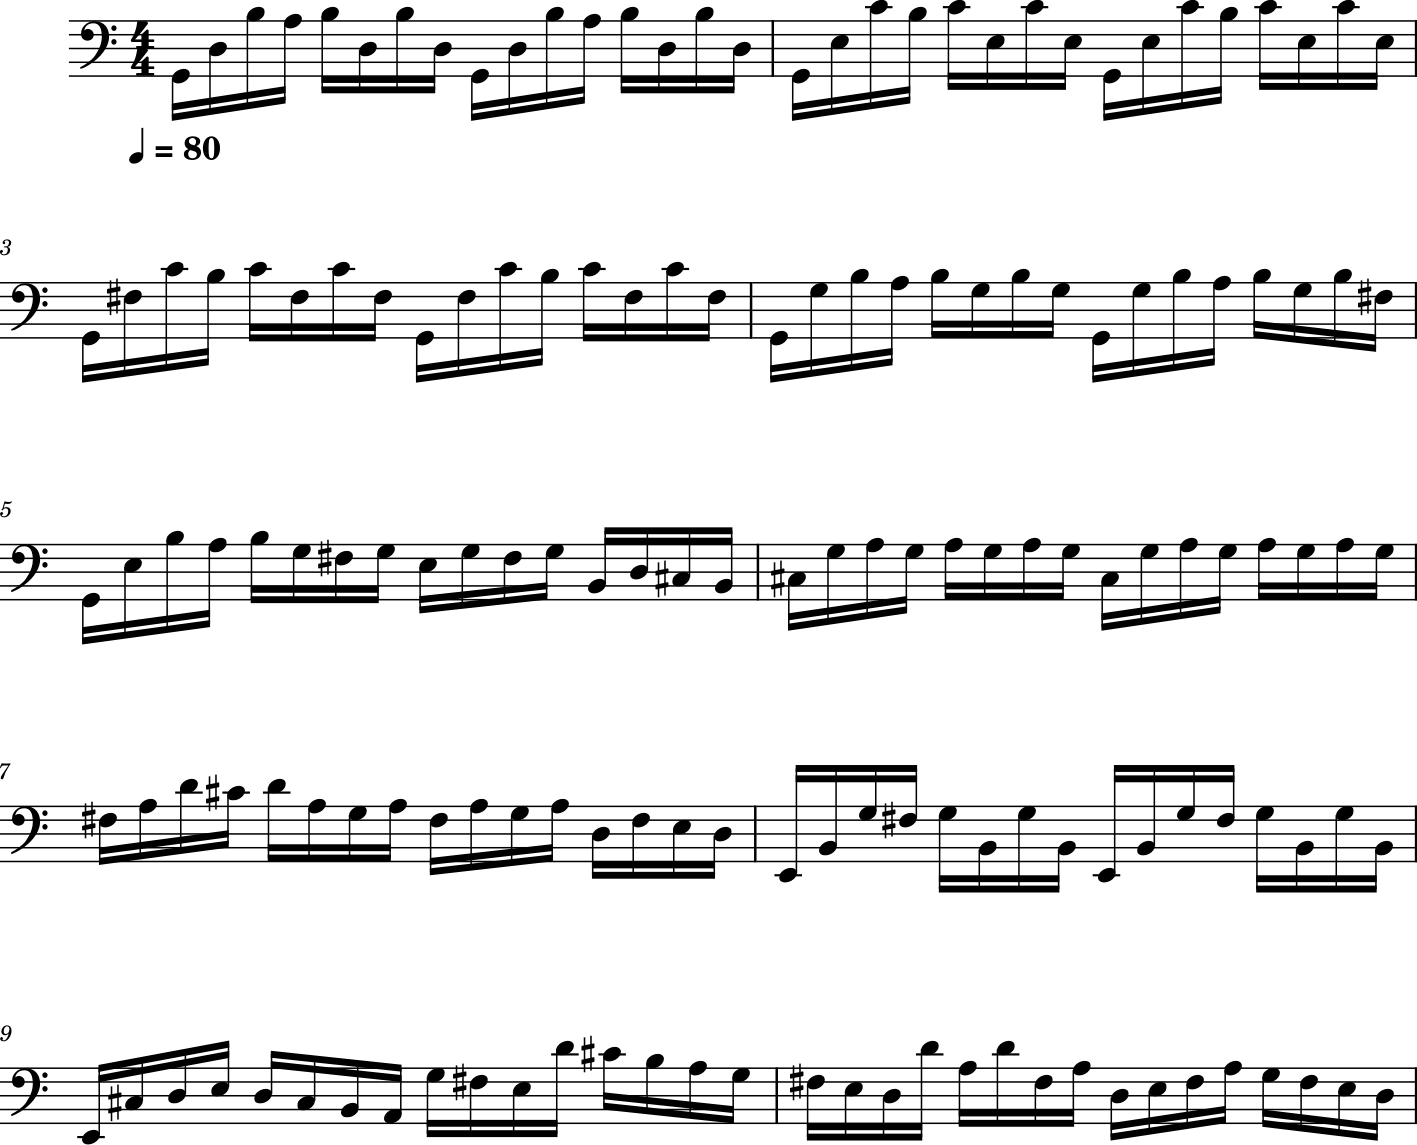

In [55]:
strm = stream.Stream()
mm = tempo.MetronomeMark(number=BPM)
strm.append(mm)  # tempo
strm.append(instrument.Violoncello())  # instrument
for i in range(len(Notes)):
    n = note.Note()
    n.pitch.midi = Notes['Note'][i]
    n.duration.quarterLength = Notes['Duration_quarter'][i]
    strm.append(n)
strm.measures(0,10).show()

In [56]:
strm.measures(0,10).show('mid')

### 4) Time Signature

Track, Time, **Time_signature**, Num, Denom, Click, NotesQ

The time signature, metronome click rate, and number of 32nd notes per MIDI quarter note (24 MIDI clock times) are given by the numeric arguments. Num gives the numerator of the time signature as specified on sheet music. Denom specifies the denominator as a negative power of two, for example 2 for a quarter note, 3 for an eighth note, etc. Click gives the number of MIDI clocks per metronome click, and NotesQ the number of 32nd notes in the nominal MIDI quarter note time of 24 clocks (8 for the default MIDI quarter note definition).

In [57]:
Time_signature = df[df['Type']=='Time_signature'].reset_index(drop=True)
Time_signature

,Track,Time,Type,Channel,Note,Velocity,Value
0,1,0,Time_signature,-1,-1,-1,4 2 24 8


*Note*: There could be multiple time signatures as the time signature is modifiable throughout the corpus.

In [58]:
Ts = Time_signature['Value'][0].split(" ")
Ts

['4', '2', '24', '8']

In [61]:
[Num, Denom, Click, NotesQ] = list(map(int, Ts))
print("Time signature: " + str(Num) +"/" + str(2**Denom))

Time signature: 4/4


As stated in this [User's Guide](https://web.mit.edu/music21/doc/usersGuide/usersGuide_14_timeSignatures.html), time signature could illuimnate us with the beat information so that we can locate the downbeats and weakbeats. For the discussion of metrical structure of tonal music, please refer to [A Generative Theory of Tonal Music, Chapter 4](https://direct.mit.edu/books/book/4673/chapter/214232/Metrical-Structure). We can compute the beat levels by the numerator and denominator of the time signature:

In [62]:
# For example,if Time signature: 3/8
Num = 3
Denom = 3
beat_number_per_measure = Num
beat_quarterLength = 4/(2**int(Denom))
print("beat_number_per_measure: "+ str(beat_number_per_measure))
print("beat_quarterLength: " + str(beat_quarterLength))

beat_number_per_measure: 3
beat_quarterLength: 0.5


In [63]:
[Num, Denom, Click, NotesQ] = list(map(int, Ts))
beat_number_per_measure = Num
beat_quarterLength = 4/(2**int(Denom))
print("beat_number_per_measure: "+ str(beat_number_per_measure))
print("beat_quarterLength: " + str(beat_quarterLength))

beat_number_per_measure: 4
beat_quarterLength: 1.0


In [64]:
measure_quarterLength = beat_number_per_measure * beat_quarterLength
measure_quarterLength

4.0

To determine the beat level for every note in the corpus, we define the downbeat of each measure as level 0, the highest beat level; the downbeat of each beat as level 1; then following the common cases (dismissing the triplets and other erratic structures), we divide the beat into half and assign the downbeats of each part as level 2; the process continues until we reach the smallest divided precision of notes.

In [68]:
Beat_level = pd.DataFrame(columns=['Track','Time_on_quarter','Channel','Note','Velocity','Duration_quarter','Structure_level'])
row = len(Notes)

for i in range(row):
    onset = Notes["Time_on_quarter"][i]
    flag = 0
    if onset%measure_quarterLength == 0:
        level = 0
        flag = 1
    elif onset%beat_quarterLength == 0:
        level = 1
        flag = 1
    else:
        le = beat_quarterLength
        for j in range(2,7):
            le = le/2
            if onset%le == 0:
                level = j
                flag = 1
                break
                
    if flag == 0:
        level = 7
    Beat_level = Beat_level.append({'Track': Notes['Track'][i],
                                    'Time_on_quarter':Notes["Time_on_quarter"][i],
                                  'Channel':Notes['Channel'][i],
                                    'Note': Notes['Note'][i],
                                  'Velocity':Notes['Velocity'][i],
                                    'Duration_quarter':Notes['Duration_quarter'][i],
                                   'Structure_level': level},ignore_index=True)
Beat_level= Beat_level.astype({
    'Track': np.int64,
    'Channel': np.int64,
    'Note': np.int64,
    'Velocity': np.int64,
    'Structure_level': np.int64
})

In [69]:
Beat_level

,Track,Time_on_quarter,Channel,Note,Velocity,Duration_quarter,Structure_level
0,2,0.00,0,43,100,0.25,0
1,2,0.25,0,50,100,0.25,3
2,2,0.50,0,59,100,0.25,2
3,2,0.75,0,57,100,0.25,3
4,2,1.00,0,59,100,0.25,1
...,...,...,...,...,...,...,...
651,3,150.75,1,50,100,0.25,3
652,3,151.25,1,50,100,0.25,3
653,3,151.75,1,50,100,0.25,3
654,3,164.00,1,59,100,4.00,0


In [70]:
Beat_level.dtypes

Track                 int64
Time_on_quarter     float64
Channel               int64
Note                  int64
Velocity              int64
Duration_quarter    float64
Structure_level       int64
dtype: object

In [71]:
color = ['red','green','blue','gray','brown','pink','purple','black']

Now we map different colors to notes at different metrical positions:

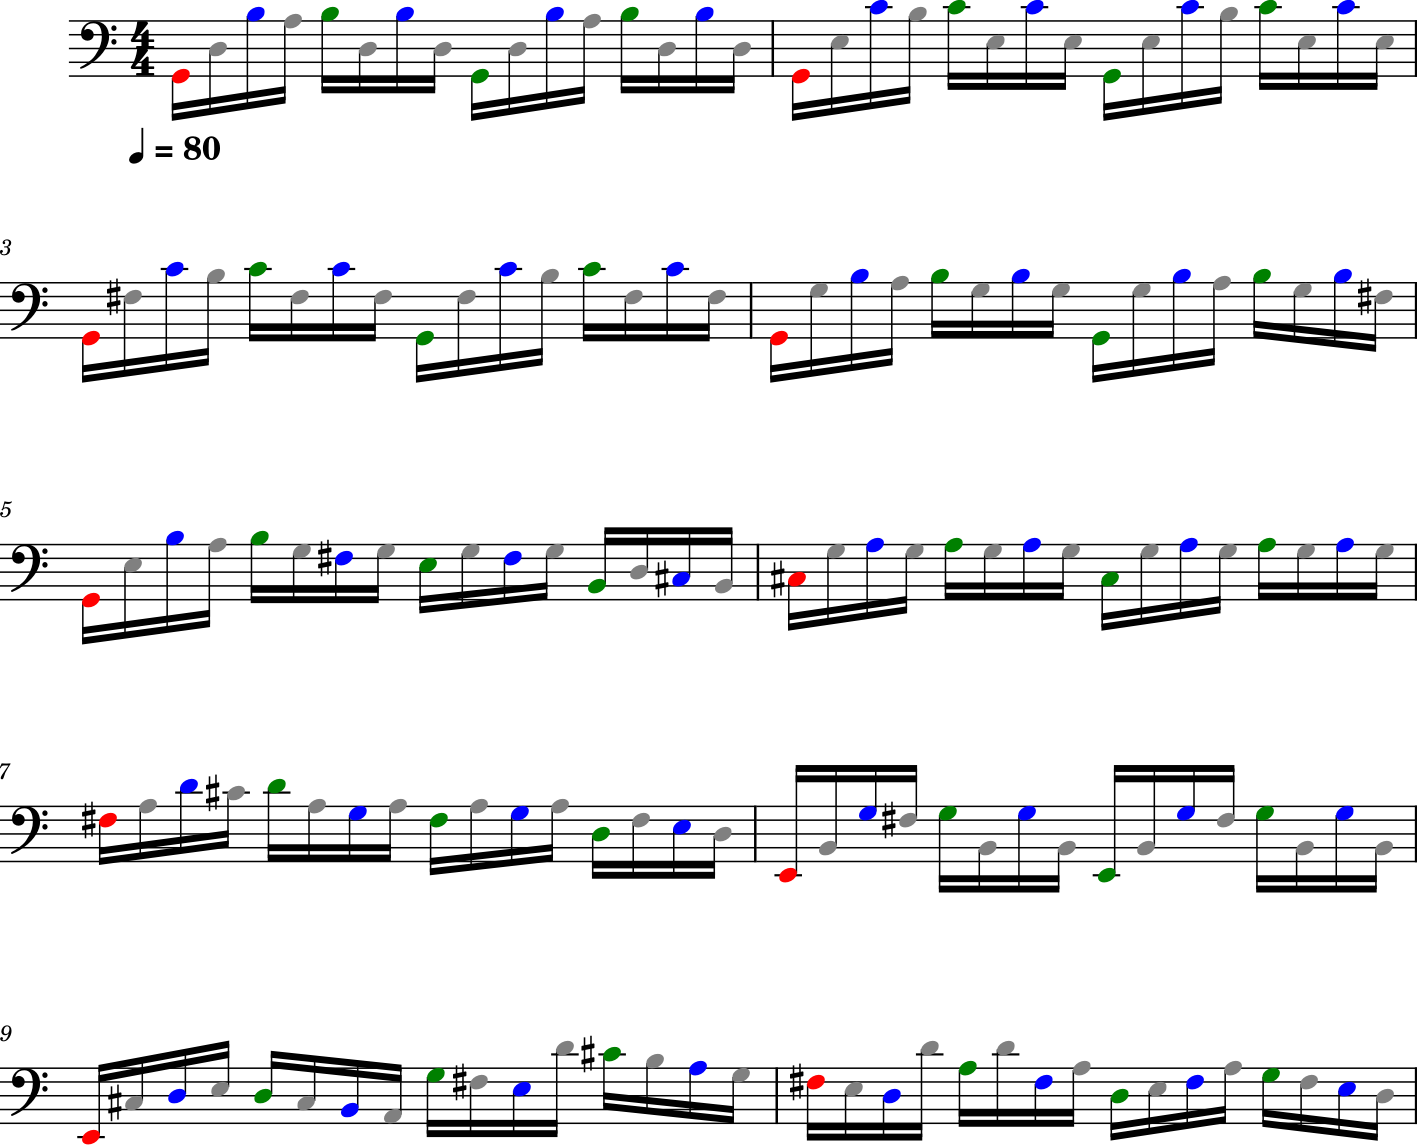

In [72]:
strm_lev = stream.Stream()
mm = tempo.MetronomeMark(number=BPM)
strm_lev.append(mm)  # tempo
strm_lev.append(instrument.Violoncello())  # instrument
for i in range(len(Beat_level)):
    n = note.Note()
    n.pitch.midi = Beat_level['Note'][i]
    n.duration.quarterLength = Beat_level['Duration_quarter'][i]
    n.style.color = color[Beat_level['Structure_level'][i]]
    strm_lev.append(n)
strm_lev.measures(0,10).show()

In [329]:
strm.measures(0,10).show('mid')

*Remark 3 (metrical structure as musical encoding)*: The beat level of each note illuminates the metrical structure and relative positions of the notes with respect to the given beats and bars specified by the notational sheet. In machine learning or corpus analysis tasks, the beat level associated with each note could be an informative source that assist the machine in better understanding of the musical pieces.

### 5) Key Signature

Track, Time, **Key_signature**, Key, Major/Minor

The key signature is specified by the numeric Key value, which represents the number of sharps (positive number) or flats (negative number) in a tonal scale, in the inclusive range −7 to 7. The Major/Minor field is a quoted string which will be major for a major key and minor for a minor key.

In [73]:
Key_signature = df[df['Type']=='Key_signature'].reset_index(drop=True)
Key_signature

,Track,Time,Type,Channel,Note,Velocity,Value
0,1,0,Key_signature,-1,-1,-1,"1 ""major"""


*Note*: There could be multiple key signatures as the key signature is modifiable throughout the corpus; or no key signature if the corpus is atonal.

In [74]:
len(Key_signature)

1

In [75]:
key = Key_signature['Value'][0].split(" ")
key

['1', '"major"']

In [76]:
key_num = int(key[0])
key_num

1

In [77]:
key_txt = ''.join([i for i in key[1] if i.isalpha()])
key_txt = key_txt.lower()
key_txt

'major'

We may overwrite the key signature value in the following way:

In [78]:
index = df[df['Type']=='Key_signature'].index[0]
df.loc[index,'Value'] = str(key_num) + " " + key_txt

In [79]:
df[df['Type']=='Key_signature']

,Track,Time,Type,Channel,Note,Velocity,Value
5,1,0,Key_signature,-1,-1,-1,1 major


Note that no matter how we change the expression of the key signature in the metadata, for example we can write the Value as "3 minor", the notes in the corpus won't change, so the music remains the same. In order to perform a key shift, we first introduce some fundamental knowledge of tonal music.

<img src="Figure/figure_2.jpg" width="800">
<caption><center> Figure 1: MIDI Note Mapper </center></caption>

<img src="Figure/figure_1.jpg" >
<caption><center> Figure 2: Keyboard View of MIDI-Notes  </center></caption>

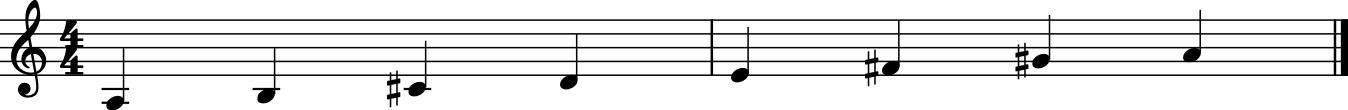

In [80]:
A_major = np.array([57,59,61,62,64,66,68,69]) # MIDI notes
strm = stream.Stream()
for i in range(len(A_major)):
    n = note.Note()
    n.pitch.midi = A_major[i]
    strm.append(n)
strm.show()

In [81]:
strm.show('mid')

### Scale Structure

The following two tables summarize the fundamentals of keys, for the explanations please refer to [Key signature](https://en.wikipedia.org/wiki/Key_signature).


|Major key	|Number of sharps (positive)|	Sharp notes	|Minor key	|Enharmonic equivalent|
|:------:|:------:|:------|:------:|:------|
|C major|	0|	–|	A minor	|None|
|G major|	1|	F♯|	E minor|	None|
|D major|	2|	F♯, C♯|	B minor|	None|
|A major|	3|	F♯, C♯, G♯|	F♯ minor|	None|
|E major|	4|	F♯, C♯, G♯, D♯|	C♯ minor|	None|
|B major|	5|	F♯, C♯, G♯, D♯, A♯|	G♯ minor|	C♭ major/A♭ minor
|F♯ major|	6|	F♯, C♯, G♯, D♯, A♯, E♯|	D♯ minor|	G♭ major/E♭ minor
|C♯ major|	7|	F♯, C♯, G♯, D♯, A♯, E♯, B♯|	A♯ minor|	D♭ major/B♭ minor|

<center>Table 1: Scales with sharp key signatures</center>




|Major key	|Number of flats (negative)|	Flat notes|	Minor key|	Enharmonic equivalent|
|:------:|:------:|:------|:------:|:------|
|C major|	0|	–|	A minor|	None|
|F major|	-1|  B♭|	D minor|	None|
|B♭ major|	-2|	B♭, E♭|	G minor|	None|
|E♭ major|	-3|	B♭, E♭, A♭|	C minor|	None|
|A♭ major|	-4|	B♭, E♭, A♭, D♭|	F minor|	None|
|D♭ major|	-5|	B♭, E♭, A♭, D♭, G♭|	B♭ minor|	C♯ major/A♯ minor|
|G♭ major|	-6|	B♭, E♭, A♭, D♭, G♭, C♭|	E♭ minor|	F♯ major/D♯ minor|
|C♭ major|	-7|	B♭, E♭, A♭, D♭, G♭, C♭, F♭|	A♭ minor|	B major/G♯ minor|

<center>Table 2: Scales with flat key signatures</center>

The circle of fifths gives an intuitive explanation for the relationships of key signatures:

<img src="Figure/Circle_of_fifths.svg" width="600">
<caption><center> Figure 3: Circle of fifths showing major and minor keys and their signatures </center></caption>


*Task*: transpose the A major scale above to C major.

In [102]:
# We know the key number of A mojor is 3 since it has 3 sharps
key_num = 3
# then C is 3 fifths below A, each fifth is 7 semitones, namely 7 MIDI steps
fifth = 7
# each scale is consisted of 12 semitones
transpose = np.mod(-key_num * fifth,12)
C_major = A_major + transpose # (+ 12 * any_integer)
C_major

array([60, 62, 64, 65, 67, 69, 71, 72])

In [103]:
np.mod(3,3)

0

In [104]:
-21%12

3

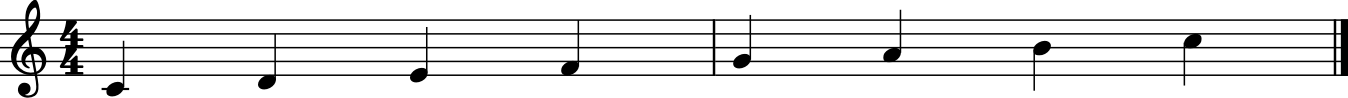

In [105]:
strm = stream.Stream()
for i in range(len(C_major)):
    n = note.Note()
    n.pitch.midi = C_major[i]
    strm.append(n)
strm.show()

In [423]:
strm.show('mid')

This calculation works for any key signature, let's define a function for key transpose:

In [116]:
def key_transpose(notes, key_num_original, key_num_target):
    """
    Arguments:
    notes -- numpy array of shape (n, )
    key_num_original -- numpy integer
    key_num_target -- numpy integer
    
    Returns:
    new_notes -- key transposed notes
    """
    key_num = key_num_target - key_num_original
    # each fifth is 7 semitones
    fifth = 7
    # each scale is consisted of 12 semitones
    transpose1 = np.mod(key_num * fifth,12)
    transpose2 = np.fmod(key_num * fifth,12)
    if np.abs(transpose1) < np.abs(transpose2):
        new_notes = notes + transpose1
    else:
        new_notes = notes + transpose2
    return new_notes

In [114]:
np.fmod(-3,12)

-3

In [112]:
np.mod(-3,12)

9

In [20]:
np.min([-2,3])

-2

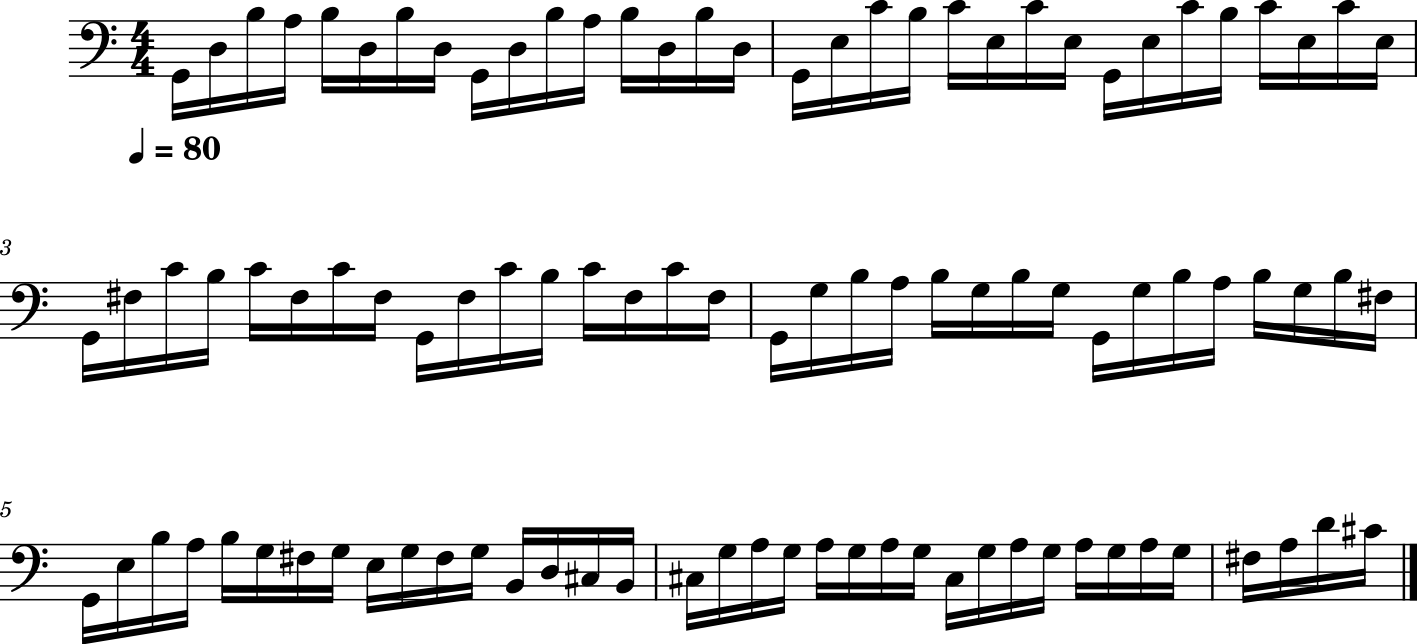

In [117]:
strm = stream.Stream()
mm = tempo.MetronomeMark(number=80)
strm.append(mm)  # tempo
strm.append(instrument.Violoncello())  # instrument
for i in range(100):
    n = note.Note()
    n.pitch.midi = Notes['Note'][i]
    n.duration.quarterLength = Notes['Duration_quarter'][i]
    strm.append(n)
strm.show()

In [118]:
notes = np.array(Notes['Note'])
key_num_original = 1

In [124]:
key_num_target = 0

In [125]:
new_notes = key_transpose(notes, key_num_original, key_num_target)

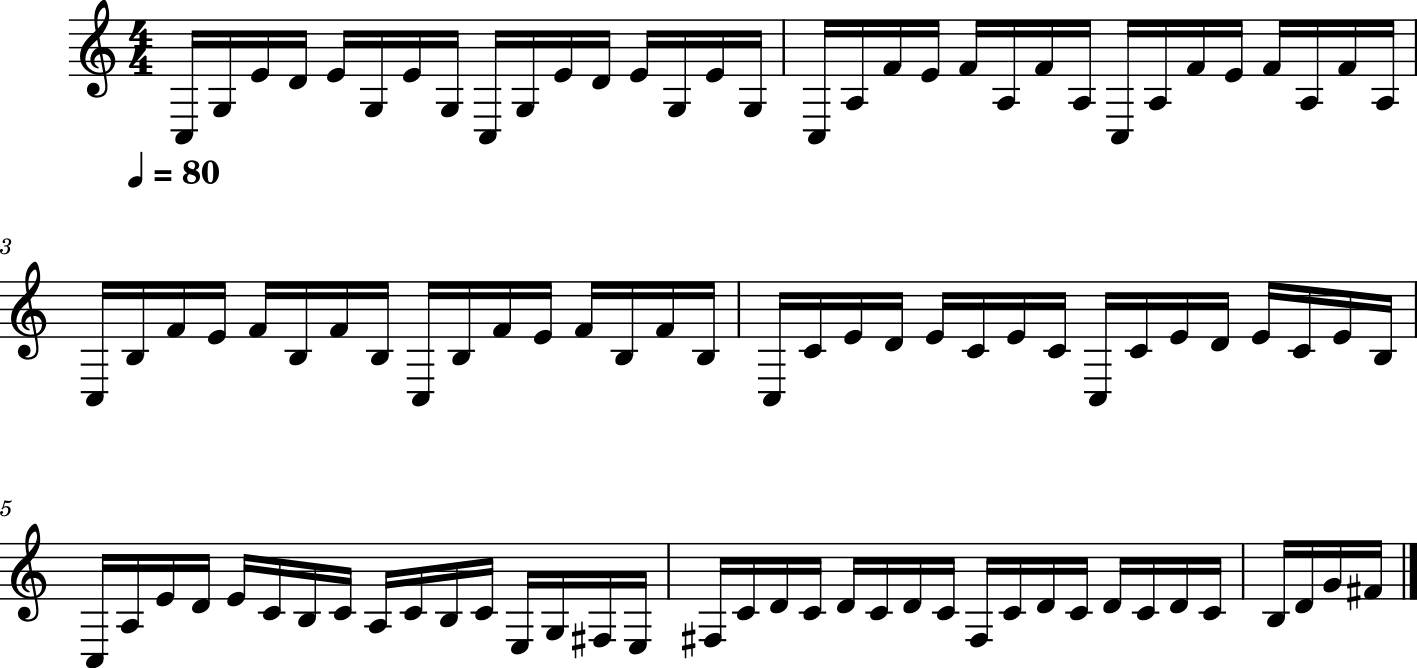

In [126]:
strm = stream.Stream()
mm = tempo.MetronomeMark(number=80)
strm.append(mm)  # tempo
strm.append(instrument.Violoncello())  # instrument
for i in range(100):
    n = note.Note()
    n.pitch.midi = new_notes[i]
    n.duration.quarterLength = Notes['Duration_quarter'][i]
    strm.append(n)
strm.show()

In [127]:
strm.show('mid')

*Remark 4 (key shift as data augmentation or data conformity)*: In our generation task (workshop 2), we will use key translation to augment our dataset. It's similar to the data augmentation in image processing, which utilizes the spatial invariability, here we use the invariability of relative position of notes. Another usage of key signature in musical research is to uniform the keys of corpus to offset the influence of different key centers. For example, we can translate all collections in our dataset to C major, then the diatonic scale of C major will generally apply, which provides data conformity for any task or research problem we aim to tackle next.

### 6) Instruments

Track, Time, __Program_c__, Channel, Program_num

Switch the specified Channel to [program (patch) Program_num](https://midiprog.com/program-numbers/), which must be between 0 and 127. The program or patch selects which __instrument__ and associated settings that channel will emulate. The General MIDI specification provides a standard set of instruments, but synthesisers are free to implement other sets of instruments and many permit the user to create custom patches and assign them to program numbers.

In [128]:
df[df['Type']=='Program_c']

,Track,Time,Type,Channel,Note,Velocity,Value
13,2,0,Program_c,-1,-1,-1,0 42
1206,3,0,Program_c,-1,-1,-1,1 42
1337,4,0,Program_c,-1,-1,-1,2 42


Program number 42 is Cello (count from 0).

*Task: change the instrument to piano, namely Program number 0.*

In [129]:
Program = df[df['Type']=='Program_c']
Program_value = np.array(Program['Value'])
Program_value

array(['0 42', '1 42', '2 42'], dtype=object)

In [130]:
Program.index

Int64Index([13, 1206, 1337], dtype='int64')

In [131]:
Pr = Program_value[0].split(" ")
Pr[1] = '0'
Pr

['0', '0']

In [132]:
for i in range(len(Program)):
    Pr = np.array(Program['Value'])[i].split(" ")
    df.loc[Program.index[i],'Value'] = Pr[0] + " 0"
df

,Track,Time,Type,Channel,Note,Velocity,Value
0,0,0,Header,1,17,480,NaN
1,1,0,Start_track,-1,-1,-1,NaN
2,1,0,Title_t,-1,-1,-1,untitled
3,1,0,SMPTE_offset,-1,-1,-1,96 0 3 0 0
4,1,0,Time_signature,-1,-1,-1,4 2 24 8
...,...,...,...,...,...,...,...
1391,17,0,Start_track,-1,-1,-1,NaN
1392,17,0,MIDI_port,-1,-1,-1,0
1393,17,0,Title_t,-1,-1,-1,Last Modified: February 22 1997
1394,17,0,End_track,-1,-1,-1,NaN


In [133]:
df[df['Type']=='Program_c']

,Track,Time,Type,Channel,Note,Velocity,Value
13,2,0,Program_c,-1,-1,-1,0 0
1206,3,0,Program_c,-1,-1,-1,1 0
1337,4,0,Program_c,-1,-1,-1,2 0


Now we write out the modified dataframe to csv, then back to Midi.

In [134]:
df.to_csv("dataframe.csv", header=False,index=False)

In [135]:
with open("dataframe.csv") as f_in, open("midifile.csv", 'w') as f_out:
    for element in f_in:
        inst_list = element.split(",")
        inst_list_len = len(inst_list)
    
        if inst_list[3] == '-1' and inst_list[4] == '-1':
            del inst_list[3:6]
            inst_list = inst_list[:-1] + inst_list[-1].split(" ")
            
        if inst_list[-1] == "\n" or inst_list[-1] == "":
            inst_list[-2] = inst_list[-2] + inst_list[-1]
            inst_list = inst_list[:-1]
            
        line = ",".join(inst_list)
        f_out.write(line)

In [136]:
# Parse the CSV output of the previous command back into a MIDI file
midi_object = pm.csv_to_midi("midifile.csv")

# Save the parsed MIDI file to disk
with open("prog0_Version.mid", "wb") as output_file:
    midi_writer = pm.FileWriter(output_file)
    midi_writer.write(midi_object)

In [137]:
s = converter.parse("prog0_Version.mid")

In [138]:
s.show('mid')

In [139]:
csv_string = pm.midi_to_csv("prog0_Version.mid")
csv_string

['0, 0, Header, 1, 17, 480\n',
 '1, 0, Start_track\n',
 '1, 0, Title_t, "untitled"\n',
 '1, 0, SMPTE_offset, 96, 0, 3, 0, 0\n',
 '1, 0, Time_signature, 4, 2, 24, 8\n',
 '1, 0, Key_signature, 1, "major"\n',
 '1, 0, Tempo, 750000\n',
 '1, 41040, Tempo, 3000000\n',
 '1, 41280, Tempo, 779221\n',
 '1, 41280, End_track\n',
 '2, 0, Start_track\n',
 '2, 0, MIDI_port, 0\n',
 '2, 0, Title_t, "Solo"\n',
 '2, 0, Program_c, 0, 0\n',
 '2, 0, Control_c, 0, 7, 100\n',
 '2, 0, Control_c, 0, 10, 64\n',
 '2, 0, Note_on_c, 0, 43, 100\n',
 '2, 120, Note_on_c, 0, 43, 0\n',
 '2, 120, Note_on_c, 0, 50, 100\n',
 '2, 240, Note_on_c, 0, 50, 0\n',
 '2, 240, Note_on_c, 0, 59, 100\n',
 '2, 360, Note_on_c, 0, 59, 0\n',
 '2, 360, Note_on_c, 0, 57, 100\n',
 '2, 480, Note_on_c, 0, 57, 0\n',
 '2, 480, Note_on_c, 0, 59, 100\n',
 '2, 600, Note_on_c, 0, 59, 0\n',
 '2, 600, Note_on_c, 0, 50, 100\n',
 '2, 720, Note_on_c, 0, 50, 0\n',
 '2, 720, Note_on_c, 0, 59, 100\n',
 '2, 840, Note_on_c, 0, 59, 0\n',
 '2, 840, Note_on_c, 0

*Remark 5 (timbre of instruments)*: The instruments in MIDI files are given by a program number between 0 and 127. This coarse category manages for orchestration but does poorly for electronic music or new music. The multifarious timbre of the modern "instruments" is incapable of being represented by simply 128 categories. This is where symbolic music fails. Besides, due to the uncertainty of specific instruments in use, one mischosen instrument may ruin the whole texture of the composition. Please listen to the following pieces in contrast:

In [1]:
PhaseDance_mid = "Music/PhaseDance.mid" # in MuseScore
PhaseDance_mp3 = "Music/PhaseDance.mp3"

*Remark 6 (expressivity of music and the limitations of notational music)*: notational music is in no doubt the fruit of human intelligence. It lends us a way to compress complicated acoustic phenomena into a few pieces of papers for people to recreate the listening experience. However, in machine learning tasks, or computer-assisted music researches, it's actually difficult to convey the musical ontology to the machine, that's also why the attempts on music generation always fail -- the computer doesn't understand music because we didn't present the "music" to it in the right way in the first place.

There are many factors that influence what we call music, including but not limited to

- Tempo (e.g. play a fast piece in a slow tempo may change our judgement for it being musical or not)
- Dynamic (the dynamics influence the emotional convey and expressivity of music)
- Expressive timing (the microtiming e.g. swing, plays a major role in musical expressivity)
- Grouping structure (musical gestalt, the human interpretation and perception of temporal acoustic stream, e.g. twelve-tone/dice music played by masters)
- Texture (the mixing of multiple acoustic sources, how to balance them to create a pleasant listening experience to be called music)

Only logic in classical music appears to be insufficient, especially when we are deviating further and further from western classical music nowadays. Sheet music lack almost all of these factors, and that's why the ML generation from sheet music is unsatisfying. These considerations propel us to pursue better representations for music. MIDI is a moderate combination of efficiency in notational music and information in acoustic music. Except for the drawback of categorical instruments, MIDI nearly covers all these expressive factors if the MIDI file is well encoded.

In [107]:
from IPython.display import Markdown as md

In [140]:
%%HTML
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/S6yuR8efotI" >
</iframe>

### 7) Control

Track, Time, __Control_c__, Channel, Control_num, Value

Set the [controller Control_num](https://anotherproducer.com/online-tools-for-musicians/midi-cc-list/) on the given Channel to the specified Value. Control_num and Value must be in the inclusive range 0 to 127. The assignment of Control_num values to effects differs from instrument to instrument. The General MIDI specification defines the meaning of controllers:

- 1 (modulation) 

- 7 (volume) 

- 10 (pan) 

- 11 (expression) 

- 64 (sustain pedal): On/Off switch that controls sustain. 0 to 63 = Off, 64 to 127 = On

- 67 (soft pedal): On/Off switch that controls soft pedal. 0 to 63 = Off, 64 to 127 = On

but not all instruments and patches respond to these controllers. Instruments which support those capabilities usually assign: 

- 91 (reverberation)

- 93 (chorus)

In [142]:
df[df['Type']=="Control_c"]

,Track,Time,Type,Channel,Note,Velocity,Value
14,2,0,Control_c,0,7,100,NaN
15,2,0,Control_c,0,10,64,NaN
1207,3,0,Control_c,1,7,100,NaN
1208,3,0,Control_c,1,10,74,NaN
1338,4,0,Control_c,2,7,100,NaN
1339,4,0,Control_c,2,10,54,NaN


In Midi music generation, the control values are often ignored (most tasks focus solely on the note values and durations). In certain cases (such as the example we use) this term could be safely ignored without much influence. However, we will instantiate that this is not always true, which highlights the significance of getting hands on the raw data (exactly the efforts we are making here :) ) 

In [143]:
csv_string = pm.midi_to_csv('Music/Arciglione08.MID')
csv_string

['0, 0, Header, 0, 1, 384\n',
 '1, 0, Start_track\n',
 '1, 0, Title_t, "Wasserklavier--Angelo Arciglione"\n',
 '1, 0, Text_t, "2006 International Piano-e-Competition Recital Round"\n',
 '1, 0, Text_t, "St. Paul, Minnesota, July 2006"\n',
 '1, 0, Text_t, "http://www.piano-e-competition.com/"\n',
 '1, 0, Instrument_name_t, "Yamaha Disklavier Pro Mark IV concert grand piano"\n',
 '1, 0, Sequencer_specific, 27, 43, 71, 00, 01, 00, 01, 00, 57, 61, 73, 73, 65, 72, 6B, 6C, 61, 76, 69, 65, 72, 20, 20, 20, 41, 6E, 67, 65, 6C, 6F, 41, 72, 63, 69, 67, 6C, 69, 6F, 6E, 65\n',
 '1, 0, Sequencer_specific, 06, 43, 71, 00, 00, 00, 45\n',
 '1, 0, System_exclusive, 15, 43, 71, 7E, 15, 00, 02, 02, 00, 0A, 0A, 0C, 04, 04, 0A, 0C, 03, 0B, 03, 0C, 02, F7\n',
 '1, 0, Sequencer_specific, 05, 43, 7B, 0C, 02, 01\n',
 '1, 0, Tempo, 512820\n',
 '1, 0, Time_signature, 4, 2, 24, 8\n',
 '1, 0, System_exclusive, 05, 7E, 7F, 09, 01, F7\n',
 '1, 1, System_exclusive, 08, 43, 10, 4C, 00, 00, 7E, 00, F7\n',
 '1, 2, System_

In [144]:
MyFile = open("Aligned.txt","w")

for element in csv_string:
    inst_list = element.split(", ");
    inst_list_len = len(inst_list)
    
    if inst_list_len == 6 and inst_list[2][-2:] != "_t":
        element = ','.join(inst_list)
            
    else:
        if inst_list_len == 3 and ','.join(inst_list)[-1] == "\n":
            element = ','.join(inst_list)[:-1] + ',-1'*3
        else:
            element = ','.join(inst_list[0:3]) + ',-1'*3 + ',' + ' '.join(inst_list[3:])

    MyFile.write(element)
    MyFile.write('\n')
    
MyFile.close()

In [145]:
df = pd.read_csv('Aligned.txt', sep=",",names = ["Track","Time","Type","Channel", "Note", "Velocity","Value"])
print(df)

      Track   Time         Type  Channel  Note  Velocity  \
0         0      0       Header        0     1       384   
1         1      0  Start_track       -1    -1        -1   
2         1      0      Title_t       -1    -1        -1   
3         1      0       Text_t       -1    -1        -1   
4         1      0       Text_t       -1    -1        -1   
...     ...    ...          ...      ...   ...       ...   
1832      1  83248    Control_c        0    64        37   
1833      1  83262    Control_c        0    64        33   
1834      1  83277    Control_c        0    64         0   
1835      1  83277    End_track       -1    -1        -1   
1836      0      0  End_of_file       -1    -1        -1   

                                                  Value  
0                                                   NaN  
1                                                   NaN  
2                      Wasserklavier--Angelo Arciglione  
3     2006 International Piano-e-Competition Re

In [147]:
Control = df[df['Type']=="Control_c"]
Control

,Track,Time,Type,Channel,Note,Velocity,Value
16,1,3,Control_c,0,0,0,NaN
17,1,4,Control_c,0,32,0,NaN
19,1,6,Control_c,0,7,100,NaN
20,1,907,Control_c,0,67,97,NaN
22,1,922,Control_c,0,67,103,NaN
...,...,...,...,...,...,...,...
1830,1,83210,Control_c,0,64,46,NaN
1831,1,83225,Control_c,0,64,42,NaN
1832,1,83248,Control_c,0,64,37,NaN
1833,1,83262,Control_c,0,64,33,NaN


In [148]:
df = df.drop(Control.index)
df = df.reset_index(drop=True)
df

,Track,Time,Type,Channel,Note,Velocity,Value
0,0,0,Header,0,1,384,NaN
1,1,0,Start_track,-1,-1,-1,NaN
2,1,0,Title_t,-1,-1,-1,Wasserklavier--Angelo Arciglione
3,1,0,Text_t,-1,-1,-1,2006 International Piano-e-Competition Recital...
4,1,0,Text_t,-1,-1,-1,St. Paul Minnesota July 2006
...,...,...,...,...,...,...,...
810,1,81382,Note_off_c,0,68,30,NaN
811,1,81402,Note_off_c,0,48,39,NaN
812,1,81738,Note_off_c,0,72,25,NaN
813,1,83277,End_track,-1,-1,-1,NaN


In [149]:
df.to_csv("dataframe.csv", header=False,index=False)

In [150]:
with open("dataframe.csv") as f_in, open("midifile.csv", 'w') as f_out:
    for element in f_in:
        inst_list = element.split(",")
        inst_list_len = len(inst_list)
    
        if inst_list[3] == '-1' and inst_list[4] == '-1':
            del inst_list[3:6]
            inst_list = inst_list[:-1] + inst_list[-1].split(" ")
            
        if inst_list[-1] == "\n" or inst_list[-1] == "":
            inst_list[-2] = inst_list[-2] + inst_list[-1]
            inst_list = inst_list[:-1]
            
        line = ",".join(inst_list)
        f_out.write(line)

In [151]:
# Parse the CSV output of the previous command back into a MIDI file
midi_object = pm.csv_to_midi("midifile.csv")

# Save the parsed MIDI file to disk
with open("no_control.mid", "wb") as output_file:
    midi_writer = pm.FileWriter(output_file)
    midi_writer.write(midi_object)

The modified version is "no_control.mid".

The advanced control effects are not presented in notational softwares such as `MuseScore`. We will use `Ableton Live` to open these two MIDI files for listening contrast. The version without control effects sounds like random walk of musical notes. Imagine what if you feed the computer with such corpus, and what the algorithm will generate after learning. It's like reading a book full of misleading information, then you reinterpret it to other people. No wonder others think you are wrong, and it's easy for them to blame you for not learning well instead of blaming the references you read.